In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
%matplotlib inline

today = date.today()

# Crypto Price Forecasting: Read Historical Crypto Day Close Price Data
In this section, we will load historical Crypto exchange closing price data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('XRP-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
#print(data.head())
data.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume
721,2022-03-27,0.832815,0.857376,0.830339,0.857343,0.857343,1505124770
722,2022-03-28,0.857408,0.908086,0.855211,0.863304,0.863304,3205464277
723,2022-03-29,0.863089,0.884441,0.848861,0.858000,0.858000,2120020042
724,2022-03-30,0.857942,0.871279,0.849425,0.860814,0.860814,1832671641
725,2022-03-31,0.860880,0.870866,0.803881,0.814564,0.814564,2611691934
726,2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103
727,2022-04-02,0.827735,0.848600,0.824828,0.824919,0.824919,1624227101
728,2022-04-03,0.824891,0.850154,0.817265,0.842950,0.842950,1348476817
729,2022-04-04,0.842923,0.842952,0.810890,0.827251,0.827251,1876069127
730,2022-04-05,0.827935,0.833054,0.819709,0.823951,0.823951,1604674560


In [3]:
# Trim the dataset to begin on September 01 2020, or about 18 months of data
data = data.loc["2020-09-01":, :]
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
726,2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103
727,2022-04-02,0.827735,0.848600,0.824828,0.824919,0.824919,1624227101
728,2022-04-03,0.824891,0.850154,0.817265,0.842950,0.842950,1348476817
729,2022-04-04,0.842923,0.842952,0.810890,0.827251,0.827251,1876069127
730,2022-04-05,0.827935,0.833054,0.819709,0.823951,0.823951,1604674560


<AxesSubplot:title={'center':'Crypto Close Prices'}>

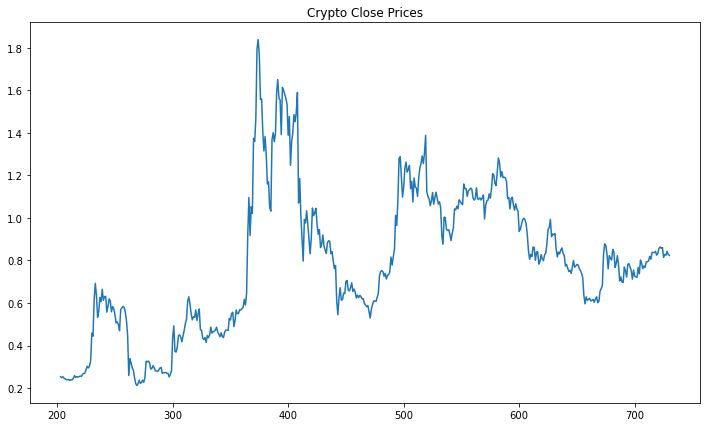

In [4]:
# Plot just the "Settle" column from the dataframe:
data.Close.plot(title='Crypto Close Prices', figsize=(12,7))

# Forecasting the Close Price using an ARIMA Model
 1. Using the *raw* Crypto **Close Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. We will analize the output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, we will determine if the model is a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Close Price.  What is the closing price forecast in the near term?

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

# Estimate an ARIMA Model:
# ARIMA(df, order=(p, d, q))
arima_model = ARIMA(data['Close'], order=(5, 1, 1))

In [ ]:
# Fit the model
arima_results = arima_model.fit()

In [7]:
# Output model summary results:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  527
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 695.103
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 05 Apr 2022   AIC                          -1374.206
Time:                        12:13:13   BIC                          -1340.069
Sample:                             1   HQIC                         -1360.841
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.003      0.398      0.691      -0.004       0.006
ar.L1.D.Close     0.2345      0.814      0.288      0.773      -1.361       1.830
ar.L2.D.Close     0.0203      0.066      0.306      0.760      -0.110       0.150
ar.L3.D.Close     0.0190      0.044      0.427      0.669      -0.068       0.106
ar.L4.D.Close     0.0554      0.047      1.179      0.238      -0.037       0.147
ar.L5.D.Close    -0.0600      0.060     -1.008      0.313      -0.177       0.057
ma.L1.D.Close    -0.2931      0.815     -0.360      0.719      -1.891       1.304
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7349           -0.0000j            1.7349           -0.5000
AR.2           -0.2940           -1.7018j            1.7270           -0.2772
AR.3           -0.2940           +1.7018j            1.7270            0.2772
AR.4            1.6228           -0.7657j            1.7943           -0.0702
AR.5            1.6228           +0.7657j            1.7943            0.0702
MA.1            3.4122           +0.0000j            3.4122            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Price Forecast'}>

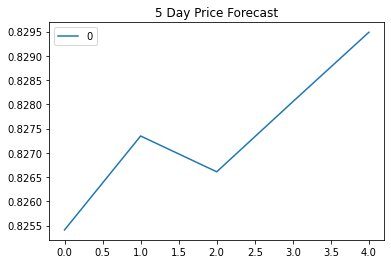

In [8]:
# Plot the 5 Day Price Forecast
pd.DataFrame(arima_results.forecast(steps=5)[0]).plot(title="5 Day Price Forecast")

# Crypto Volatility Forecasting with GARCH

Rather than predicting price, we forecast near-term **volatility** of future Crypto price action. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures *Close*, the following GARCH model is produced:

1. GARCH: We developed a GARCH model and fit it to the close data. Note: Setting parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [9]:
from arch import arch_model
from datetime import datetime

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 203 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       528 non-null    datetime64[ns]
 1   Open       528 non-null    float64       
 2   High       528 non-null    float64       
 3   Low        528 non-null    float64       
 4   Close      528 non-null    float64       
 5   Adj Close  528 non-null    float64       
 6   Volume     528 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 29.0 KB


In [11]:
# set the index
data.set_index('Date', inplace=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103
2022-04-02,0.827735,0.848600,0.824828,0.824919,0.824919,1624227101
2022-04-03,0.824891,0.850154,0.817265,0.842950,0.842950,1348476817
2022-04-04,0.842923,0.842952,0.810890,0.827251,0.827251,1876069127
2022-04-05,0.827935,0.833054,0.819709,0.823951,0.823951,1604674560


In [12]:
# Create a series using "Close" price percentage returns, drop nan"s, and check the results:
vol = (data[["Close"]].pct_change() * 100)
vol = vol.replace(-np.inf, np.nan).dropna()
vol.tail()

,Close
Date,
2022-04-01,1.617555
2022-04-02,-0.340811
2022-04-03,2.185791
2022-04-04,-1.862384
2022-04-05,-0.398891


In [13]:
#Isolate 'Close' returns
garch_df = vol['Close']
garch_df.head()

Date
2020-10-26   -1.787030
2020-10-27    1.693284
2020-10-28   -2.781343
2020-10-29   -1.452018
2020-10-30   -1.283968
Name: Close, dtype: float64

In [14]:
# Estimate a GARCH model:
garch_model = arch_model(garch_df, mean="Zero", vol="GARCH", p=2, q=1)

In [15]:
# Fit the model
garch_results = garch_model.fit(disp="off")

In [16]:
# Summarize the model results
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1780.37
Distribution:                  Normal   AIC:                           3568.74
Method:            Maximum Likelihood   BIC:                           3585.81
                                        No. Observations:                  527
Date:                Tue, Apr 05 2022   Df Residuals:                      527
Time:                        12:14:51   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         13.4596     10.823      1.244      0.214    [ -7.754, 34.673]
alpha[1]       0.6945      0.366      1.899  5.758e-02 [-2.233e-02,  1.411]
alpha[2]   4.9109e-11      0.432  1.138e-10      1.000    [ -0.846,  0.846]
beta[1]        0.3055      0.352      0.869      0.385    [ -0.384,  0.995]
===========================================================================

Covariance estimator: robust
"""

In [17]:
# Find the last day of the dataset
last_day = vol.index.max().strftime('%Y-%m-%d')
last_day

'2022-04-05'

In [ ]:
## Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
garch_forecasts = garch_results.forecast(start='2022-03-29', horizon=forecast_horizon)
garch_forecasts

In [19]:
# Annualize the forecast
intermediate = np.sqrt(garch_forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2022-03-29,71.620014,92.310642,109.147070,123.713019,136.736021
2022-03-30,70.552598,91.484957,108.449645,123.098147,136.179962
2022-03-31,99.823246,115.570362,129.415366,141.916049,153.401412
2022-04-01,83.029605,101.418655,116.951152,130.649914,143.042750
2022-04-02,74.284688,94.393025,110.913802,125.274497,138.150381


In [20]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05
h.1,71.620014,70.552598,99.823246,83.029605,74.284688,76.901127,76.193811,72.064050
h.2,92.310642,91.484957,115.570362,101.418655,94.393025,96.465598,95.902686,92.655575
h.3,109.147070,108.449645,129.415366,116.951152,110.913802,112.682917,112.201396,109.438950
h.4,123.713019,123.098147,141.916049,130.649914,125.274497,126.843478,126.415907,123.970609
h.5,136.736021,136.179962,153.401412,143.042750,138.150381,139.574698,139.186241,136.969122


<AxesSubplot:title={'center':'5 Day Crypto Volatility Forecast'}>

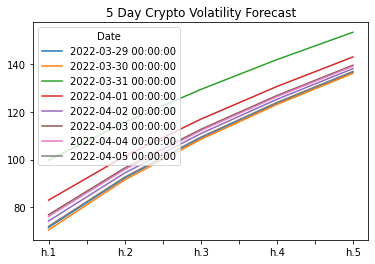

In [21]:
# Plot the final forecast
final.plot(title='5 Day Crypto Volatility Forecast')